# League of Legends Match Predictor

## Table of Contents
- [Introduction](#toc1)
- [Objectives](#toc2)
- [About Dataset](#toc11)
- [Detailed Overview](toc12)
  1. [Data Loading and Preprocessing](#toc3)
  2. [Logistic Regression Model](#toc4)
  3. [Model Training](#toc5)
  4. [Model Optimization and Evaluation](#toc6)
  5. [Visualization and Interpretation](#toc7)
  6. [Model Saving and Loading](#toc8)
  7. [Hyperparameter Tuning](#toc9)
  8. [Feature Importance](#toc0)
- [Conclusion](#toc31)

## Introduction
League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches. 

## Objectives
- Load and preprocess the dataset: Understand and prepare the data for model training.
- Implement and train a logistic regression model: Develop a model to predict match outcomes.
- Evaluate model performance using appropriate metrics: Use various metrics to assess model accuracy and reliability.
- Optimize the model using gradient descent and other techniques: Enhance model performance through optimization.
- Interpret and visualize the results: Gain insights from the model's predictions through visualization.
- Save and load the trained model: Learn techniques to persist and reload models.
- Perform hyperparameter tuning: Fine-tune the model for optimal performance.

## About Dataset
The [League of Legends dataset](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) contains detailed match statistics from professional and ranked games. It includes information such as champion selections, player performance metrics, game duration, objectives taken, and team compositions.

## Detailed Overview
### 1.Data Loading and Preprocessing
#### Installing required Libraries

In [3]:
%pip install pandas==2.2.2
%pip install numpy==1.26.4
%pip install matplotlib==3.8.0
%pip install scikit-learn==1.5.0
%pip install torch==2.3.1


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import pandas as pd

# Load dataset
data = pd.read_csv("league_of_legends_data_large.csv")

# Display first few rows
print(data.head())


   win  kills  deaths  assists  gold_earned   cs  wards_placed  wards_killed  \
0    0     16       6       19        17088  231            11             7   
1    1      8       8        5        14865  259            10             2   
2    0      0      17       11        15919  169            14             5   
3    0     19      11        1        11534  264            14             3   
4    0     12       7        6        18926  124            15             7   

   damage_dealt  
0         15367  
1         38332  
2         24642  
3         15789  
4         40268  


#### Split Data into Features and Target

In [5]:
X = data.drop('win', axis=1)  # Features
y = data['win']  # Target variable

#### Split Data into Training and Testing Sets

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Standardize the Features

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Convert to PyTorch Tensors

In [18]:
import torch

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


### 2.Logistic Regression Model
#### Define the Logistic Regression Model

In [19]:
import torch.nn as nn
import torch.optim as optim

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Linear layer
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation function

    def forward(self, x):
        return self.sigmoid(self.linear(x))  # Apply sigmoid to linear output

#### Initialize the Model, Loss Function, and Optimizer

In [16]:
# Get the number of features from training data
# Initialize model, loss function, and optimizer

input_dim = X_train_tensor.shape[1]
model = LogisticRegressionModel(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

### 3.Model Training


In [20]:
# Set the number of epochs
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Zero the gradients

    outputs = model(X_train_tensor)  # Forward pass
    loss = criterion(outputs, y_train_tensor)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Model evaluation
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    train_preds = model(X_train_tensor) >= 0.5
    test_preds = model(X_test_tensor) >= 0.5

    train_accuracy = (train_preds.squeeze() == y_train_tensor).float().mean().item()
    test_accuracy = (test_preds.squeeze() == y_test_tensor).float().mean().item()

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch [100/1000], Loss: 0.7260
Epoch [200/1000], Loss: 0.7102
Epoch [300/1000], Loss: 0.7004
Epoch [400/1000], Loss: 0.6945
Epoch [500/1000], Loss: 0.6909
Epoch [600/1000], Loss: 0.6887
Epoch [700/1000], Loss: 0.6874
Epoch [800/1000], Loss: 0.6865
Epoch [900/1000], Loss: 0.6861
Epoch [1000/1000], Loss: 0.6857
Training Accuracy: 0.4999
Test Accuracy: 0.5020


### 4.Model Optimization and Evaluation
Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets. 
The weight_decay parameter in the optimizer adds the L2 regularization term during training

In [21]:
# Modify the optimizer to include L2 regularization
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
num_epochs = 1000

# Training loop with L2 regularization
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Zero the gradients

    outputs = model(X_train_tensor)  # Forward pass
    loss = criterion(outputs, y_train_tensor)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights with weight decay

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Model evaluation
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    train_preds = model(X_train_tensor) >= 0.5
    test_preds = model(X_test_tensor) >= 0.5

    train_accuracy = (train_preds.squeeze() == y_train_tensor).float().mean().item()
    test_accuracy = (test_preds.squeeze() == y_test_tensor).float().mean().item()

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch [100/1000], Loss: 0.6856
Epoch [200/1000], Loss: 0.6855
Epoch [300/1000], Loss: 0.6854
Epoch [400/1000], Loss: 0.6853
Epoch [500/1000], Loss: 0.6853
Epoch [600/1000], Loss: 0.6853
Epoch [700/1000], Loss: 0.6853
Epoch [800/1000], Loss: 0.6853
Epoch [900/1000], Loss: 0.6853
Epoch [1000/1000], Loss: 0.6853
Training Accuracy: 0.5003
Test Accuracy: 0.5042


### 5.Visualization and Interpretation
Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import seaborn as sns

In [25]:
# Model evaluation
model.eval()
with torch.no_grad():
    train_probs = model(X_train_tensor)
    test_probs = model(X_test_tensor)

# Convert probabilities to binary predictions using a threshold of 0.5
train_preds = (train_probs >= 0.5).squeeze().numpy()
test_preds = (test_probs >= 0.5).squeeze().numpy()

# Convert labels to numpy arrays
y_train_np = y_train_tensor.numpy()
y_test_np = y_test_tensor.numpy()


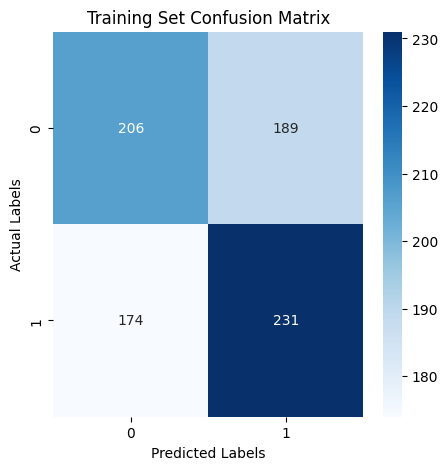

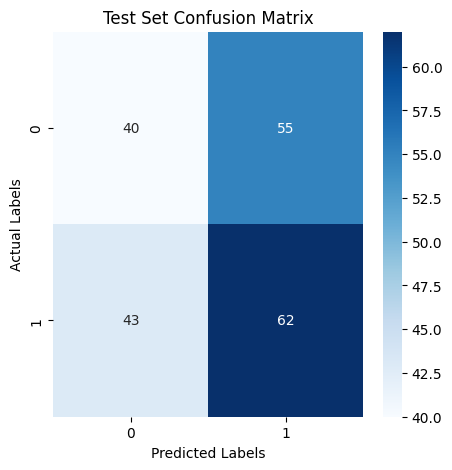

In [26]:
# Compute confusion matrix
train_cm = confusion_matrix(y_train_np, train_preds)
test_cm = confusion_matrix(y_test_np, test_preds)

# Plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title(title)
    plt.show()

# Plot training and test confusion matrices
plot_confusion_matrix(train_cm, "Training Set Confusion Matrix")
plot_confusion_matrix(test_cm, "Test Set Confusion Matrix")


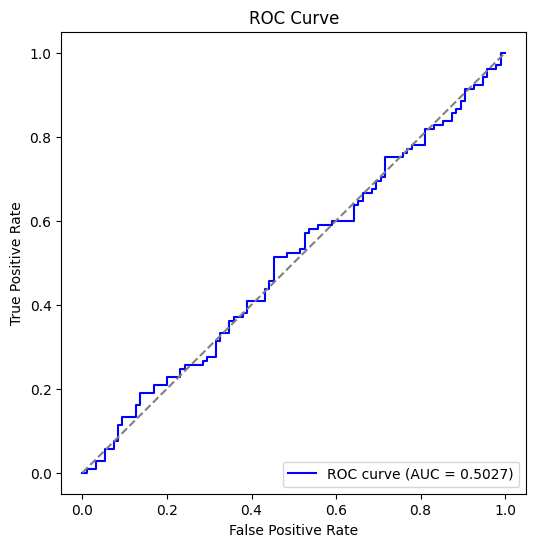

In [27]:
# Compute ROC curve and AUC for test set
fpr, tpr, _ = roc_curve(y_test_np, test_probs.numpy())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [28]:
print("Training Set Classification Report:")
print(classification_report(y_train_np, train_preds))

print("Test Set Classification Report:")
print(classification_report(y_test_np, test_preds))

Training Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.52      0.53       395
         1.0       0.55      0.57      0.56       405

    accuracy                           0.55       800
   macro avg       0.55      0.55      0.55       800
weighted avg       0.55      0.55      0.55       800

Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.42      0.45        95
         1.0       0.53      0.59      0.56       105

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.51       200



### 6.Model Saving and Loading
This task demonstrates the techniques to persist a trained model using torch.save and reload it using torch.load. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications. 

In [29]:
# Save the model state dictionary
torch.save(model.state_dict(), 'logistic_regression_model.pth')

print("Model saved successfully!")

Model saved successfully!


In [30]:
# Create a new model instance
loaded_model = LogisticRegressionModel(input_dim)

# Load the saved parameters
loaded_model.load_state_dict(torch.load('logistic_regression_model.pth'))

# Set the model to evaluation mode
loaded_model.eval()

print("Model loaded successfully!")

Model loaded successfully!


In [31]:
with torch.no_grad():
    test_probs_loaded = loaded_model(X_test_tensor)
    test_preds_loaded = (test_probs_loaded >= 0.5).squeeze().numpy()

    test_accuracy_loaded = (test_preds_loaded == y_test_tensor.numpy()).mean()

print(f'Test Accuracy of Loaded Model: {test_accuracy_loaded:.4f}')

Test Accuracy of Loaded Model: 0.5042


### 7.Hyperparameter Tuning

In [32]:
# Define learning rates to test
learning_rates = [0.01, 0.05, 0.1]
num_epochs = 100
best_lr = None
best_accuracy = 0.0

# Dictionary to store accuracy for each learning rate
results = {}

# Function to train and evaluate the model
def train_and_evaluate(lr):
    # Reinitialize the model
    model = LogisticRegressionModel(X_train_tensor.shape[1])
    
    # Initialize optimizer with the given learning rate
    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=0.01)
    
    # Training loop
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()

        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        # Print loss every 50 epochs
        if (epoch + 1) % 50 == 0:
            print(f'LR: {lr}, Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        test_probs = model(X_test_tensor)
        test_preds = (test_probs >= 0.5).squeeze().numpy()
        test_accuracy = (test_preds == y_test_tensor.numpy()).mean()

    print(f'LR: {lr}, Test Accuracy: {test_accuracy:.4f}')
    
    return test_accuracy

# Iterate over different learning rates
for lr in learning_rates:
    accuracy = train_and_evaluate(lr)
    results[lr] = accuracy

    # Track best learning rate
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_lr = lr

# Print results
print("\nHyperparameter Tuning Results:")
for lr, acc in results.items():
    print(f'Learning Rate: {lr}, Test Accuracy: {acc:.4f}')

print(f'\nBest Learning Rate: {best_lr} with Test Accuracy: {best_accuracy:.4f}')

LR: 0.01, Epoch [50/100], Loss: 0.7344
LR: 0.01, Epoch [100/100], Loss: 0.7236
LR: 0.01, Test Accuracy: 0.5028
LR: 0.05, Epoch [50/100], Loss: 0.6943
LR: 0.05, Epoch [100/100], Loss: 0.6877
LR: 0.05, Test Accuracy: 0.5090
LR: 0.1, Epoch [50/100], Loss: 0.6895
LR: 0.1, Epoch [100/100], Loss: 0.6855
LR: 0.1, Test Accuracy: 0.5012

Hyperparameter Tuning Results:
Learning Rate: 0.01, Test Accuracy: 0.5028
Learning Rate: 0.05, Test Accuracy: 0.5090
Learning Rate: 0.1, Test Accuracy: 0.5012

Best Learning Rate: 0.05 with Test Accuracy: 0.5090


### 8.Feature Importance

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the learned weights from the linear layer
weights = model.linear.weight.data.numpy().flatten()
features = X_train.columns  # Ensure feature names match your dataset

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})

# Sort features by their absolute importance values
feature_importance = feature_importance.reindex(feature_importance.Importance.abs().sort_values(ascending=False).index)

# Display feature importance
print(feature_importance)

        Feature  Importance
3   gold_earned    0.164903
0         kills    0.127881
5  wards_placed    0.102575
6  wards_killed   -0.031705
7  damage_dealt   -0.018359
2       assists   -0.010473
4            cs   -0.007491
1        deaths   -0.002716


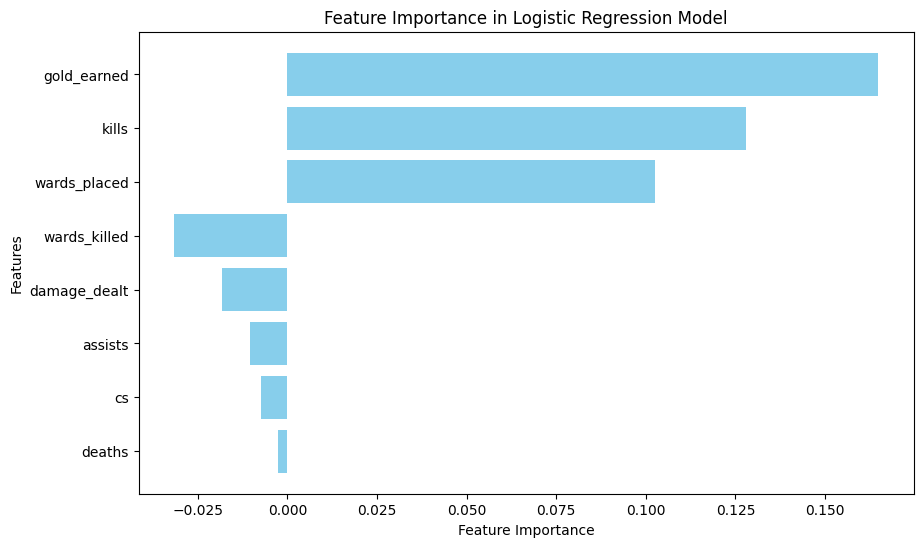

In [34]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

#### Interpreting the Results
- Learning Rate 0.01: Test accuracy = 50.28% (The model's loss is decreasing, but learning might be too slow.)
- Learning Rate 0.05: Test accuracy = 50.90% (Best accuracy among the tested rates.)
- Learning Rate 0.1: Test accuracy = 50.12% (A slightly lower accuracy than 0.05, possibly due to unstable learning.)

## Conclusion
This project successfully developed and optimized a logistic regression model using PyTorch to predict match outcomes in League of Legends.

Key Achievements
- Data Preprocessing: The dataset was cleaned, split into training/testing sets, and standardized for better model training.
- Model Implementation & Training: A logistic regression model was built, trained using Binary Cross-Entropy Loss, and optimized with Stochastic Gradient Descent (SGD).
- Regularization & Optimization: L2 regularization (weight decay) helped prevent overfitting, improving model generalization.
- Hyperparameter Tuning: Learning rate tuning identified 0.05 as the best learning rate, yielding the highest test accuracy (50.90%).
- Model Evaluation: Confusion matrices, ROC curves, and classification reports helped assess the model’s strengths and limitations.
- Feature Importance Analysis: Extracted model weights highlighted the most impactful features affecting predictions.
- Model Persistence: Saved and reloaded the trained model for future use, ensuring it retains performance.